<a href="https://colab.research.google.com/github/Georgia-MAX-holic/R6_data_stduy/blob/main/%20R6_data_stduy/R6_result_pyspark/R6_tree.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install pyspark
!pip install category_encoders

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import pyspark
from pyspark.sql import SparkSession
from google.colab import drive
from category_encoders import OneHotEncoder

from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor

import graphviz
from ipywidgets import interact
from sklearn.tree import DecisionTreeRegressor, export_graphviz
spark=SparkSession.builder.appName("R6_study").getOrCreate()

In [ ]:
drive.mount('/content/gdrive', force_remount=True)

Mounted at /content/gdrive


In [ ]:
path = '/content/gdrive/MyDrive/cpding/asdf/레식 데이터.csv'


In [ ]:
df_spark=spark.read.option("header","true").csv(path, inferSchema=True)

In [ ]:
class spark :
  
  def __init__(self, df):   
    self.df = df

  def make_ratio_Column(self , name: str , numerator:float , denominator:float):

    self.df = self.df.withColumn(name, (self.df[numerator]/ self.df[denominator]).cast("float"))
    return self.df

#원래 했던거거
#  def make_Column(self , name , up , down):
#
#    df_spark = self.df.withColumn(name, self.df[up]/ self.df[down] )
#    define = spark(df_spark) # 의미가 없는거
#    return df_spark

  def del_Column(self,col_name):
    self.df = self.df.drop(col_name)
    return self.df 

  def div_team(self , team ):
    self.df = self.df.filter(self.df["role"] == team)
    return self.df



def show_tree(tree, colnames):
    dot = export_graphviz(tree, feature_names=colnames, filled=True, rounded=True)   
    return graphviz.Source(dot)


In [ ]:
print(df_spark.dtypes)
print(df_spark.printSchema())


[('skillrank', 'string'), ('role', 'string'), ('operator', 'string'), ('primaryweapon', 'string'), ('secondaryweapon', 'string'), ('secondarygadget', 'string'), ('nbwins', 'int'), ('nbkills', 'int'), ('nbdeaths', 'int'), ('nbpicks', 'int')]
root
 |-- skillrank: string (nullable = true)
 |-- role: string (nullable = true)
 |-- operator: string (nullable = true)
 |-- primaryweapon: string (nullable = true)
 |-- secondaryweapon: string (nullable = true)
 |-- secondarygadget: string (nullable = true)
 |-- nbwins: integer (nullable = true)
 |-- nbkills: integer (nullable = true)
 |-- nbdeaths: integer (nullable = true)
 |-- nbpicks: integer (nullable = true)

None


In [ ]:

del_rank = ["Bronze", "Copper", "Unranked"]

for del_rank in del_rank:
   df_spark = df_spark.filter(~(df_spark["skillrank"]==del_rank))


In [ ]:
define = spark(df_spark)
encoder = OneHotEncoder(use_cat_names= True)

In [ ]:
df_spark=define.make_ratio_Column('k/d_ratio','nbkills' ,"nbdeaths") 
df_spark=define.make_ratio_Column('win_ratio','nbkills','nbpicks').dropna()

In [ ]:

use_list= ["role","primaryweapon","secondaryweapon","nbwins", "nbkills","nbdeaths","nbpicks",'win_ratio','k/d_ratio']

df_spark=df_spark.select(use_list)


df_spark.show()

+--------+-------------+---------------+------+-------+--------+-------+----------+----------+
|    role|primaryweapon|secondaryweapon|nbwins|nbkills|nbdeaths|nbpicks| win_ratio| k/d_ratio|
+--------+-------------+---------------+------+-------+--------+-------+----------+----------+
|Attacker|           AR|         Pistol|     0|      0|       1|      1|       0.0|       0.0|
|Attacker|           AR|             SG|     0|      0|       1|      1|       0.0|       0.0|
|Attacker|       Shield|         Pistol|     2|      4|       1|      3| 1.3333334|       4.0|
|Attacker|           AR|         Pistol|     0|      1|       1|      1|       1.0|       1.0|
|Attacker|           AR|         Pistol|     3|      7|       1|      4|      1.75|       7.0|
|Attacker|           AR|         Pistol|     1|      1|       1|      2|       0.5|       1.0|
|Attacker|           AR|         Pistol|     0|      0|       1|      1|       0.0|       0.0|
|Attacker|           AR|            SMG|     2|   

In [ ]:
import pandas as pd


In [ ]:
df_spark_ATK=df_spark.filter(df_spark["role"]=="Attacker")
df_spark_DEF= df_spark.filter(df_spark["role"] == "Defender")

df_spark_ATK.show()

+--------+-------------+---------------+------+-------+--------+-------+----------+----------+
|    role|primaryweapon|secondaryweapon|nbwins|nbkills|nbdeaths|nbpicks| win_ratio| k/d_ratio|
+--------+-------------+---------------+------+-------+--------+-------+----------+----------+
|Attacker|           AR|         Pistol|     0|      0|       1|      1|       0.0|       0.0|
|Attacker|           AR|             SG|     0|      0|       1|      1|       0.0|       0.0|
|Attacker|       Shield|         Pistol|     2|      4|       1|      3| 1.3333334|       4.0|
|Attacker|           AR|         Pistol|     0|      1|       1|      1|       1.0|       1.0|
|Attacker|           AR|         Pistol|     3|      7|       1|      4|      1.75|       7.0|
|Attacker|           AR|         Pistol|     1|      1|       1|      2|       0.5|       1.0|
|Attacker|           AR|         Pistol|     0|      0|       1|      1|       0.0|       0.0|
|Attacker|           AR|            SMG|     2|   

In [ ]:
Hot_ATK_operators=df_spark_ATK.toPandas()
Hot_DEF_operators=df_spark_DEF.toPandas() 

#전처리 끝났으니 Pandas


In [ ]:
Hot_ATK_operators = encoder.fit_transform(Hot_ATK_operators) # 원핫 인코딩 
Hot_DEF_operators = encoder.fit_transform(Hot_DEF_operators) # 원핫 인코딩

In [ ]:
cols = Hot_ATK_operators[['primaryweapon_SMG','primaryweapon_SG','primaryweapon_AR']]
target = Hot_ATK_operators["k/d_ratio"]

X_col = pd.DataFrame( data=cols)
y_target = pd.DataFrame( data=target)
linear = LinearRegression()
linear.fit(X_col, y_target)
print('R2: ', linear.score(X_col, y_target))
print('Intercept: ', linear.intercept_[0])

R2:  0.03138030705350414
Intercept:  0.9736696713126723


/usr/local/lib/python3.7/dist-packages/sklearn/tree/_classes.py:370: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  FutureWarning,


R2 0.025281187154438833


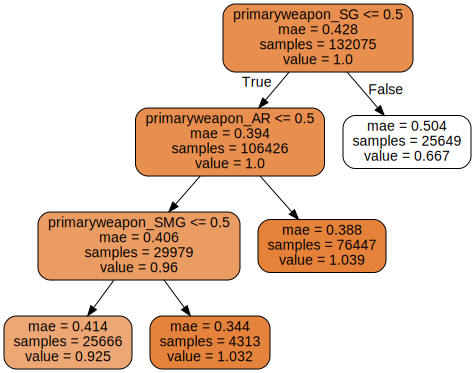

In [ ]:



tree = DecisionTreeRegressor(criterion="mae")
tree.fit(X_col, y_target)
print('R2', tree.score(X_col, y_target))
show_tree(tree, colnames=X_col.columns)



R2:  0.03138030705350414
Intercept:  0.9736696713126723


/usr/local/lib/python3.7/dist-packages/sklearn/tree/_classes.py:370: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  FutureWarning,


R2 0.025281187154438833


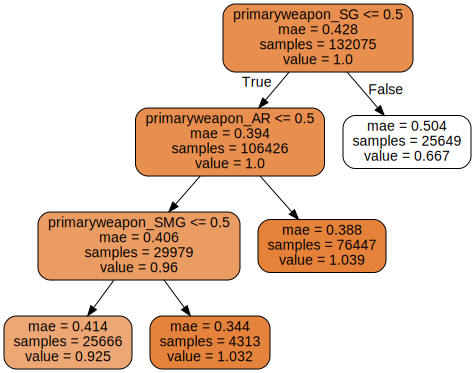

In [ ]:


cols = Hot_ATK_operators[['primaryweapon_SMG','primaryweapon_SG','primaryweapon_AR']]
target = Hot_ATK_operators["k/d_ratio"]

X_col = pd.DataFrame( data=cols)
y_target = pd.DataFrame( data=target)
linear = LinearRegression()
linear.fit(X_col, y_target)
print('R2: ', linear.score(X_col, y_target))
print('Intercept: ', linear.intercept_[0])

tree = DecisionTreeRegressor(criterion="mae")
tree.fit(X_col, y_target)
print('R2', tree.score(X_col, y_target))
show_tree(tree, colnames=X_col.columns)

